In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
CSV_FILE = 'df_sin_encriptados.csv'

df = pd.read_csv(CSV_FILE)
display(df.head())

,campus,sexo,edad,entorno_vivienda,tamano_familia,independizado_padres,educacion_madre,educacion_padre,ocupacion_madre,ocupacion_padre,...,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,salud,suspensos,faltas,nota1,nota2,nota3
0,A Coruña,V,15.0,urbano,<=3,independizado,4.0,3.0,profesor,servicios,...,4.0,3.0,1.0,1.0,4.0,0.0,0.0,14.0,14.0,14.0
1,Vigo,M,18.0,rural,>3,independizado,2.0,2.0,servicios,otro,...,2.0,1.0,1.0,1.0,4.0,0.0,5.0,14.0,14.0,15.0
2,A Coruña,V,17.0,urbano,>3,independizado,3.0,2.0,servicios,servicios,...,5.0,5.0,2.0,4.0,5.0,3.0,2.0,8.0,8.0,7.0
3,A Coruña,M,18.0,urbano,>3,independizado,4.0,4.0,salud,salud,...,4.0,4.0,1.0,1.0,4.0,1.0,2.0,14.0,12.0,13.0
4,A Coruña,V,19.0,urbano,>3,independizado,4.0,2.0,salud,otro,...,4.0,4.0,1.0,1.0,1.0,0.0,9.0,11.0,10.0,10.0


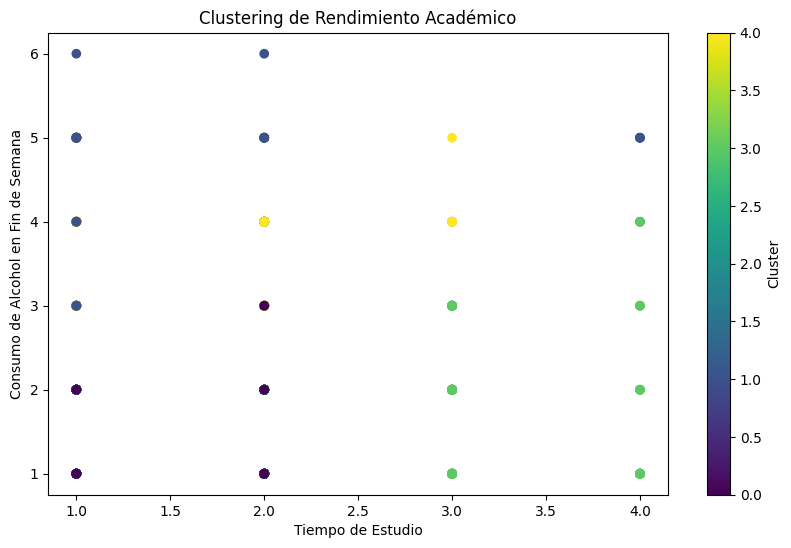

In [ ]:
# Seleccionar las variables de interés
df['nota_media'] = df[['nota1', 'nota2', 'nota3']].mean(axis=1)
variables_interes = ['tiempo_estudio', 'consumo_alcohol_fin_de_semana', 'consumo_alcohol_entre_semana', 'nota_media']

# Filtrar el DataFrame con las variables seleccionadas
df_interes = df[variables_interes]

# Estandarizar los datos
scaler = StandardScaler()
df_interes_scaled = scaler.fit_transform(df_interes)

# Aplicar KMeans
kmeans_academico = KMeans(n_clusters=5, random_state=42)
clusters_academico = kmeans_academico.fit_predict(df_interes_scaled)

# Añadir los clústeres al DataFrame original
df['Cluster_Academico'] = clusters_academico

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(df['tiempo_estudio'], df['consumo_alcohol_fin_de_semana'], c=df['Cluster_Academico'], cmap='viridis')
plt.xlabel('Tiempo de Estudio')
plt.ylabel('Consumo de Alcohol en Fin de Semana')
plt.title('Clustering de Rendimiento Académico')
plt.colorbar(label='Cluster')
plt.show()


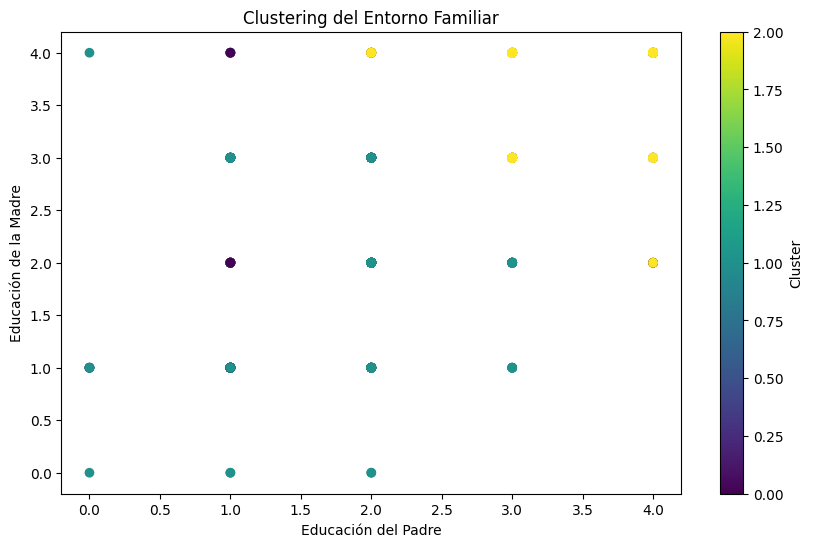

In [4]:
# Seleccionar las variables de interés
variables_familia = ['educacion_padre', 'educacion_madre', 'relacion_familiar', 'independizado_padres']

# Convertir la variable categórica 'independizado_padres' a numérica
df['independizado_padres_num'] = df['independizado_padres'].apply(lambda x: 1 if x == 'independizado' else 0)

# Filtrar el DataFrame con las variables seleccionadas
df_familia = df[['educacion_padre', 'educacion_madre', 'relacion_familiar', 'independizado_padres_num']]

# Estandarizar los datos
scaler_familia = StandardScaler()
df_familia_scaled = scaler_familia.fit_transform(df_familia)

# Aplicar KMeans
kmeans_familia = KMeans(n_clusters=3, random_state=42)
clusters_familia = kmeans_familia.fit_predict(df_familia_scaled)

# Añadir los clústeres al DataFrame original
df['Cluster_Familia'] = clusters_familia

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(df['educacion_padre'], df['educacion_madre'], c=df['Cluster_Familia'], cmap='viridis')
plt.xlabel('Educación del Padre')
plt.ylabel('Educación de la Madre')
plt.title('Clustering del Entorno Familiar')
plt.colorbar(label='Cluster')
plt.show()

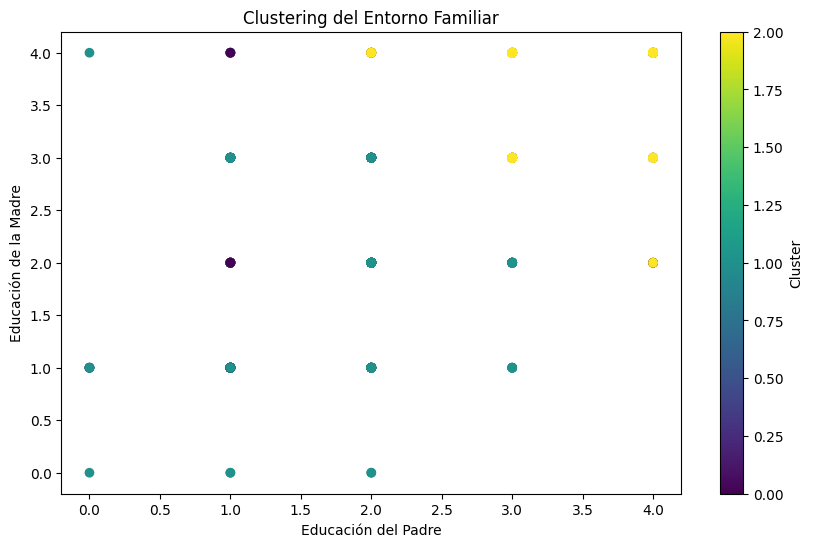

In [5]:
# Seleccionar las variables de interés
variables_familia = ['educacion_padre', 'educacion_madre', 'relacion_familiar', 'independizado_padres']

# Convertir la variable categórica 'independizado_padres' a numérica
df['independizado_padres_num'] = df['independizado_padres'].apply(lambda x: 1 if x == 'independizado' else 0)

# Filtrar el DataFrame con las variables seleccionadas
df_familia = df[['educacion_padre', 'educacion_madre', 'relacion_familiar', 'independizado_padres_num']]

# Estandarizar los datos
scaler_familia = StandardScaler()
df_familia_scaled = scaler_familia.fit_transform(df_familia)

# Aplicar KMeans
kmeans_familia = KMeans(n_clusters=3, random_state=42)
clusters_familia = kmeans_familia.fit_predict(df_familia_scaled)

# Añadir los clústeres al DataFrame original
df['Cluster_Familia'] = clusters_familia

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(df['educacion_padre'], df['educacion_madre'], c=df['Cluster_Familia'], cmap='viridis')
plt.xlabel('Educación del Padre')
plt.ylabel('Educación de la Madre')
plt.title('Clustering del Entorno Familiar')
plt.colorbar(label='Cluster')
plt.show()